<a href="https://colab.research.google.com/github/ElhassanGitUub/PyProj/blob/main/Finding_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. You will explore the distribution of key variables and focus on identifying outliers in this lab.

## **Objectives**
In this lab, you will perform the following:

Analyze the distribution of key variables in the dataset.

Identify and remove outliers using statistical methods.

Perform relevant statistical and correlation analysis.

#### Install and import the required libraries

- !pip install pandas
- !pip install matplotlib
- !pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>
Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


**Steps**:
- Count the number of respondents in each industry using value_counts().
- Plot a bar chart using Matplotlib and Seaborn.
- Highlight key trends based on the data distribution.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


<ipython-input-3-8864ee0272b4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


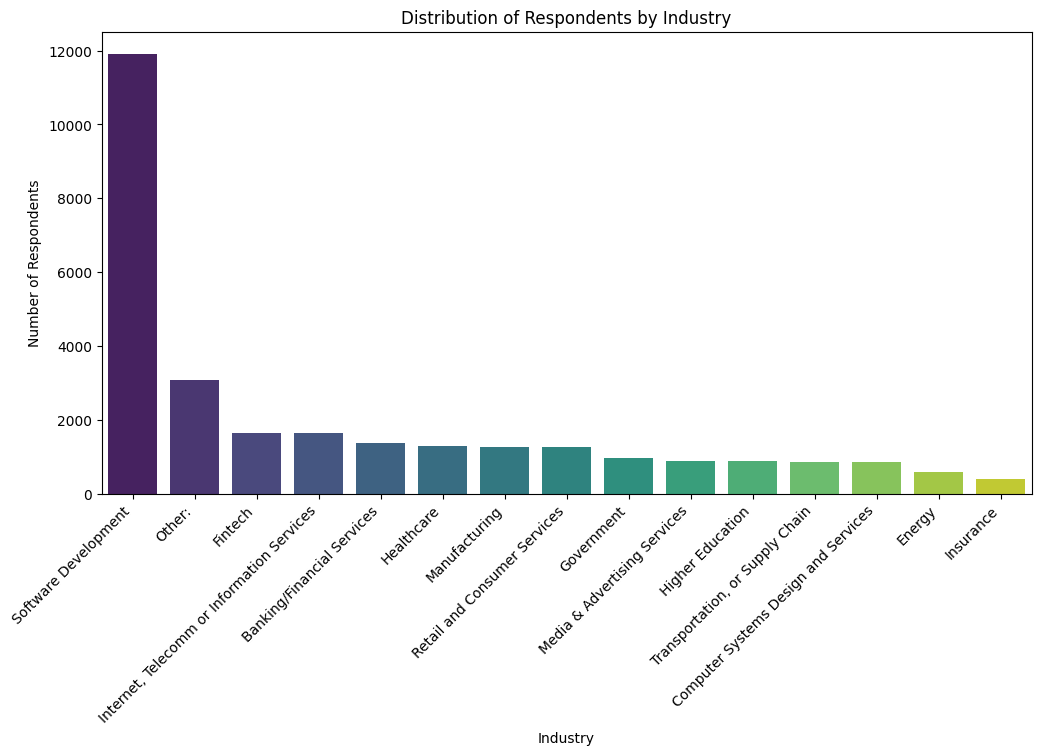

In [3]:


# Load data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Check the column names
print(df.columns)

# Assuming the industry column is named 'Industry' (adjust if needed)
industry_counts = df['Industry'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Respondents by Industry")

# Show plot
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).




**Steps**:
- Calculate basic statistics: Mean, median, and standard deviation of ConvertedCompYearly.
- Define an outlier threshold: Use 3 standard deviations above the mean.
- Filter out respondents exceeding this threshold.


In [4]:

# Load data
# Check column names
# Assuming 'ConvertedCompYearly' is the correct column (adjust if necessary)
comp_col = 'ConvertedCompYearly'

# Drop missing values
df = df[df[comp_col].notna()]

# Calculate basic statistics
mean_comp = df[comp_col].mean()
median_comp = df[comp_col].median()
std_comp = df[comp_col].std()

# Define outlier threshold (3 standard deviations above mean)
threshold = mean_comp + (3 * std_comp)

# Identify high earners
high_earners = df[df[comp_col] > threshold]

# Display results
print(f"Mean: {mean_comp:.2f}")
print(f"Median: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")
print(f"Outlier Threshold: {threshold:.2f}")
print(f"Number of respondents exceeding threshold: {high_earners.shape[0]}")

# Display high earners
high_earners


Mean: 86155.29
Median: 65000.00
Standard Deviation: 186756.97
Outlier Threshold: 646426.21
Number of respondents exceeding threshold: 89


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,38220,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,On the job training;Other online resources (e....,Books;Written Tutorials;Interactive tutorial;V...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,NaN,1000000.0,10.0
39643,39644,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,1300000.0,NaN
40066,40067,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Other (please specify):,NaN,...,20.0,0.0,20.0,0.0,0.0,10.0,Appropriate in length,Easy,800000.0,10.0
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,NaN


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


**Steps**:
- Calculate the IQR:
 - IQR = Q3 (75th percentile) - Q1 (25th percentile)
- Determine the outlier bounds:
 - Lower bound = Q1 - 1.5 * IQR
 - Upper bound = Q3 + 1.5 * IQR
-Filter outliers and visualize them using a box plot.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Q1 (25th percentile): 32712.00
Q3 (75th percentile): 107971.50
IQR: 75259.50
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978


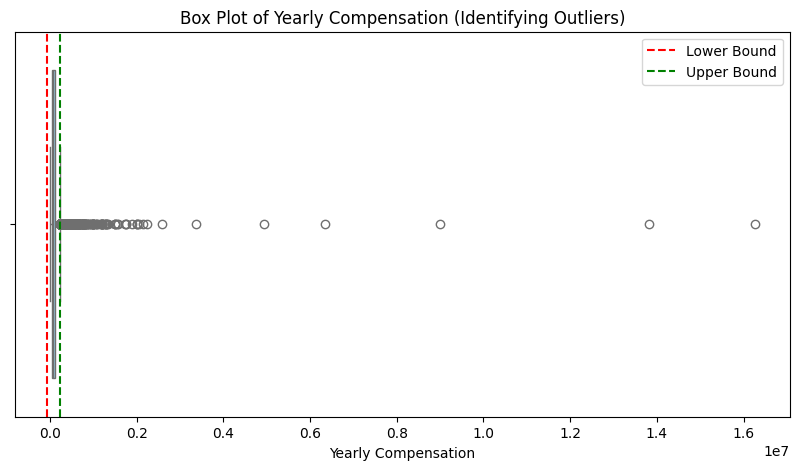

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Check column names
print(df.columns)

# Assuming 'ConvertedCompYearly' is the correct column (adjust if necessary)
comp_col = 'ConvertedCompYearly'

# Drop missing values
df = df[df[comp_col].notna()]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[comp_col].quantile(0.25)
Q3 = df[comp_col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = df[(df[comp_col] < lower_bound) | (df[comp_col] > upper_bound)]

# Display statistics
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")

# Box Plot Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x=df[comp_col], color="skyblue")
plt.axvline(lower_bound, color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='dashed', label='Upper Bound')
plt.legend()
plt.title("Box Plot of Yearly Compensation (Identifying Outliers)")
plt.xlabel("Yearly Compensation")
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


**Steps :**
- Calculate the IQR:
 -Q1 = 25th percentile
 -Q3 = 75th percentile
 -IQR = Q3 - Q1
- Determine the outlier bounds:
 - Lower bound = Q1 - 1.5 * IQR
 - Upper bound = Q3 + 1.5 * IQR
-Create a new DataFrame excluding rows with outliers.
 - Validate the size of the new dataset

In [6]:
import pandas as pd

# Load data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Check column names
print(df.columns)

# Assuming 'ConvertedCompYearly' is the correct column (adjust if necessary)
comp_col = 'ConvertedCompYearly'

# Drop missing values
df = df[df[comp_col].notna()]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[comp_col].quantile(0.25)
Q3 = df[comp_col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Create a new DataFrame excluding outliers
df_no_outliers = df[(df[comp_col] >= lower_bound) & (df[comp_col] <= upper_bound)]

# Validate the size of the new dataset
print(f"Original Dataset Size: {df.shape[0]} rows")
print(f"New Dataset Size (Without Outliers): {df_no_outliers.shape[0]} rows")
print(f"Rows Removed: {df.shape[0] - df_no_outliers.shape[0]}")


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Original Dataset Size: 23435 rows
New Dataset Size (Without Outliers): 22457 rows
Rows Removed: 978


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


**Steps:**
- Transform the Age column: If Age is categorical, map it to numeric values.
- Compute correlation coefficients: Use Pearson correlation for numerical features.
- Visualize the correlation matrix: Use a heatmap for better interpretation.

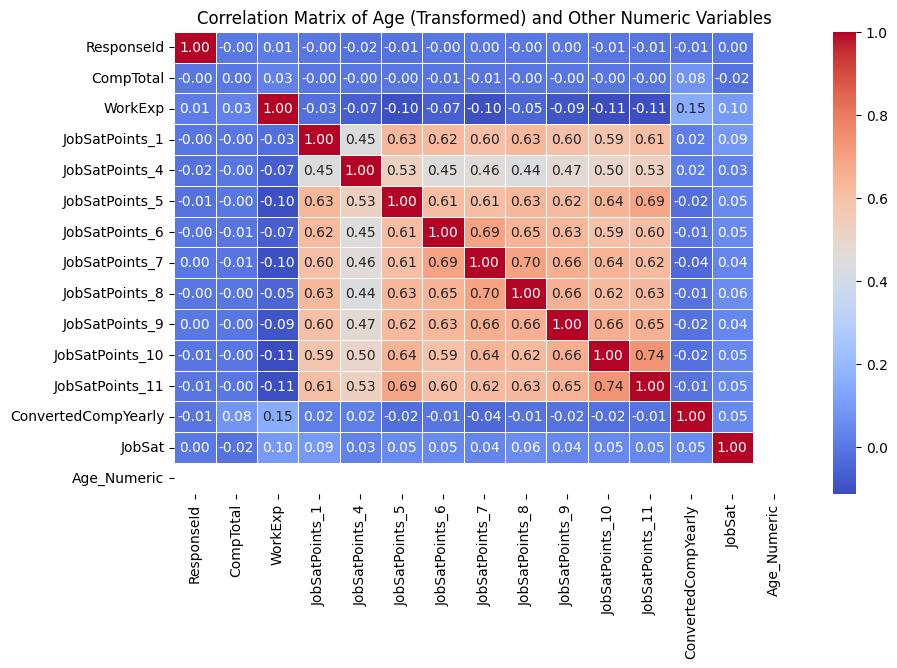

Correlation of Age with Other Numeric Variables:
 ResponseId            NaN
CompTotal             NaN
WorkExp               NaN
JobSatPoints_1        NaN
JobSatPoints_4        NaN
JobSatPoints_5        NaN
JobSatPoints_6        NaN
JobSatPoints_7        NaN
JobSatPoints_8        NaN
JobSatPoints_9        NaN
JobSatPoints_10       NaN
JobSatPoints_11       NaN
ConvertedCompYearly   NaN
JobSat                NaN
Name: Age_Numeric, dtype: float64


In [8]:

# Assume 'Age' is categorical and needs mapping (adjust if necessary)
age_mapping = {
    'Under 18': 17,
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 70
}

# Map 'Age' column to numeric values
if 'Age' in df.columns:
    df['Age_Numeric'] = df['Age'].map(age_mapping)

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Age (Transformed) and Other Numeric Variables")
plt.show()

# Display correlations of 'Age_Numeric' with other numeric features
age_correlation = correlation_matrix['Age_Numeric'].drop('Age_Numeric').sort_values(ascending=False)
print("Correlation of Age with Other Numeric Variables:\n", age_correlation)


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.
